In [1]:
import bmdrc 
import pandas as pd

## Module 1: Input Data Modules 

##### Binary Class

In [2]:
morpho_example_wide = pd.read_csv("/Users/degn400/Git_Repos/bmdrc/data/Binary_Morphology_Wide.csv")

Wide = bmdrc.input_data_classes.BinaryClass(
    df = morpho_example_wide,
    chemical = "chemical.id",
    plate = "plate.id",
    well = "well",
    concentration = "conc",
    format = "wide"
)

print(Wide.df)
print(Wide.format)
print(Wide.chemical)
print(Wide.plate)
print(Wide.well)
print(Wide.concentration)
print(Wide.endpoint)
print(Wide.value)

       chemical.id  conc  plate.id well endpoint  value
0             3757   0.0     19877  H01     MO24    0.0
1             3757   0.0     19877  H02     MO24    0.0
2             3757   0.0     19877  H03     MO24    0.0
3             3757   0.0     19877  H04     MO24    0.0
4             3757   0.0     19877  H05     MO24    0.0
...            ...   ...       ...  ...      ...    ...
19867         3863  10.0     20637  H08     DNC_    0.0
19868         3863  10.0     20637  H09     DNC_    0.0
19869         3863  10.0     20637  H10     DNC_    0.0
19870         3863  10.0     20637  H11     DNC_    0.0
19871         3863  10.0     20637  H12     DNC_    0.0

[19872 rows x 6 columns]
wide
chemical.id
plate.id
well
conc
endpoint
value


In [3]:
morpho_example_long = pd.read_csv("/Users/degn400/Git_Repos/bmdrc/data/Binary_Morphology_Long.csv")

Long = bmdrc.input_data_classes.BinaryClass(
    df = morpho_example_long,
    chemical = "chemical.id",
    plate = "plate.id",
    well = "well",
    concentration = "conc",
    endpoint = "endpoint",
    value = "value"
)

print(Long.df)
print(Long.format)
print(Long.chemical)
print(Long.plate)
print(Long.well)
print(Long.concentration)
print(Long.endpoint)
print(Long.value)

       chemical.id  conc  plate.id well endpoint  value
0             3757   0.0     19877  H01     MO24    0.0
1             3757   0.0     19877  H02     MO24    0.0
2             3757   0.0     19877  H03     MO24    0.0
3             3757   0.0     19877  H04     MO24    0.0
4             3757   0.0     19877  H05     MO24    0.0
...            ...   ...       ...  ...      ...    ...
19867         3863  10.0     20637  H08     DNC_    0.0
19868         3863  10.0     20637  H09     DNC_    0.0
19869         3863  10.0     20637  H10     DNC_    0.0
19870         3863  10.0     20637  H11     DNC_    0.0
19871         3863  10.0     20637  H12     DNC_    0.0

[19872 rows x 6 columns]
long
chemical.id
plate.id
well
conc
endpoint
value


## Module 2: Pre-Processing Modules

#### Binary Class: Combine Endpoints

In [4]:
endpoint_dict = {"ANY24":["MO24", "DP24", "SM24", "NC24"], 
                 "ANY120":["MORT", "YSE_", "AXIS", "EYE_", "SNOU", "JAW_", "OTIC", "PE__", "BRAI", 
                           "SOMI", "PFIN", "CFIN", "PIG_", "CIRC", "TRUN", "SWIM", "NC__", "TR__", 
                           "MO24", "DP24", "SM24", "NC24"],
                "TOT_MORT":["MO24","MORT"],
                "ALL_BUT_MORT":["DP24","SM24","NC24", "YSE_", "AXIS", "EYE_", "SNOU", "JAW_", 
                                "OTIC", "PE__", "BRAI", "SOMI", "PFIN", "CFIN", "PIG_", "CIRC",
                                "TRUN", "SWIM", "NC__", "TR__"],
                "BRN_": ["BRAI", "OTIC", "PFIN"],
                "CRAN":["EYE_", "SNOU", "JAW_"],
                "EDEM":["YSE", "PE__"],
                "LTRK":["TRUN", "CFIN"],
                "MUSC":["CIRC", "SWIM", "SOMI"],
                "SKIN":["PIG_"],
                "TCHR":["TR__"]}

# Add new endpoint - twice
Long.combine_and_create_new_endpoints(endpoint_dict)
Long.combine_and_create_new_endpoints({"ANY24":["MO24", "DP24", "SM24", "NC24"]})

Long.df

ANY24 is already an existing endpoint


,chemical.id,conc,plate.id,well,endpoint,value
0,3757,0.0,19877,H01,MO24,0.0
1,3757,0.0,19877,H02,MO24,0.0
2,3757,0.0,19877,H03,MO24,0.0
3,3757,0.0,19877,H04,MO24,0.0
4,3757,0.0,19877,H05,MO24,0.0
...,...,...,...,...,...,...
859,3863,10.0,20637,H08,TCHR,0.0
860,3863,10.0,20637,H09,TCHR,0.0
861,3863,10.0,20637,H10,TCHR,0.0
862,3863,10.0,20637,H11,TCHR,0.0


In [5]:
Long.report_combination

{'ANY24': ['MO24', 'DP24', 'SM24', 'NC24'],
 'ANY120': ['MORT',
  'YSE_',
  'AXIS',
  'EYE_',
  'SNOU',
  'JAW_',
  'OTIC',
  'PE__',
  'BRAI',
  'SOMI',
  'PFIN',
  'CFIN',
  'PIG_',
  'CIRC',
  'TRUN',
  'SWIM',
  'NC__',
  'TR__',
  'MO24',
  'DP24',
  'SM24',
  'NC24'],
 'TOT_MORT': ['MO24', 'MORT'],
 'ALL_BUT_MORT': ['DP24',
  'SM24',
  'NC24',
  'YSE_',
  'AXIS',
  'EYE_',
  'SNOU',
  'JAW_',
  'OTIC',
  'PE__',
  'BRAI',
  'SOMI',
  'PFIN',
  'CFIN',
  'PIG_',
  'CIRC',
  'TRUN',
  'SWIM',
  'NC__',
  'TR__'],
 'BRN_': ['BRAI', 'OTIC', 'PFIN'],
 'CRAN': ['EYE_', 'SNOU', 'JAW_'],
 'EDEM': ['YSE', 'PE__'],
 'LTRK': ['TRUN', 'CFIN'],
 'MUSC': ['CIRC', 'SWIM', 'SOMI'],
 'SKIN': ['PIG_'],
 'TCHR': ['TR__']}

In [6]:
Long.df[Long.df[Long.endpoint] == "DAVID"]

,chemical.id,conc,plate.id,well,endpoint,value


In [7]:
# Add new endpoint
Wide.combine_and_create_new_endpoints(endpoint_dict)

Wide.df

,chemical.id,conc,plate.id,well,endpoint,value
0,3757,0.0,19877,H01,MO24,0.0
1,3757,0.0,19877,H02,MO24,0.0
2,3757,0.0,19877,H03,MO24,0.0
3,3757,0.0,19877,H04,MO24,0.0
4,3757,0.0,19877,H05,MO24,0.0
...,...,...,...,...,...,...
859,3863,10.0,20637,H08,TCHR,0.0
860,3863,10.0,20637,H09,TCHR,0.0
861,3863,10.0,20637,H10,TCHR,0.0
862,3863,10.0,20637,H11,TCHR,0.0


#### Binary Class: Set wells to NA

In [8]:
Long.set_well_to_na(endpoint_name = "DNC_", endpoint_value = 1)

# All of these wells should be NA 
Long.df[Long.df["bmdrc.Well.ID"] == "3757 21.9 19877 B01"]


,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID
216,3757,21.9,19877,B01,MO24,NaN,3757 21.9 19877 B01
1080,3757,21.9,19877,B01,DP24,NaN,3757 21.9 19877 B01
1944,3757,21.9,19877,B01,SM24,NaN,3757 21.9 19877 B01
2808,3757,21.9,19877,B01,NC24,NaN,3757 21.9 19877 B01
3672,3757,21.9,19877,B01,MORT,NaN,3757 21.9 19877 B01
4536,3757,21.9,19877,B01,YSE_,NaN,3757 21.9 19877 B01
5400,3757,21.9,19877,B01,AXIS,NaN,3757 21.9 19877 B01
6264,3757,21.9,19877,B01,EYE_,NaN,3757 21.9 19877 B01
7128,3757,21.9,19877,B01,SNOU,NaN,3757 21.9 19877 B01
7992,3757,21.9,19877,B01,JAW_,NaN,3757 21.9 19877 B01


In [9]:
Long.set_well_to_na(endpoint_name = "MORT", endpoint_value = 1, except_endpoint = ["DP24", "MO24", "SM24", "MORT"])

# All but DP24, MO24, SM24, and MORT should be np.nan
Long.df[Long.df["bmdrc.Well.ID"] == "3757 2.65 19890 G04"]

,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID
63,3757,2.65,19890,G04,MO24,0.0,3757 2.65 19890 G04
927,3757,2.65,19890,G04,DP24,1.0,3757 2.65 19890 G04
1791,3757,2.65,19890,G04,SM24,0.0,3757 2.65 19890 G04
2655,3757,2.65,19890,G04,NC24,NaN,3757 2.65 19890 G04
3519,3757,2.65,19890,G04,MORT,1.0,3757 2.65 19890 G04
4383,3757,2.65,19890,G04,YSE_,NaN,3757 2.65 19890 G04
5247,3757,2.65,19890,G04,AXIS,NaN,3757 2.65 19890 G04
6111,3757,2.65,19890,G04,EYE_,NaN,3757 2.65 19890 G04
6975,3757,2.65,19890,G04,SNOU,NaN,3757 2.65 19890 G04
7839,3757,2.65,19890,G04,JAW_,NaN,3757 2.65 19890 G04


In [10]:
Long.report_well_na

[[['DNC_'], [1], None], [['MORT'], [1], ['DP24', 'MO24', 'SM24', 'MORT']]]

#### Binary Class: Remove Endpoint

In [11]:
# Should trigger an error
#Long.remove_endpoints(["DNC_", "CATS"])

In [12]:
# DNC_ should not be removed
Long.df[Long.df[Long.endpoint] == "DNC_"]

,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID
19008,3757,0.0,19877,H01,DNC_,0.0,3757 0.0 19877 H01
19009,3757,0.0,19877,H02,DNC_,0.0,3757 0.0 19877 H02
19010,3757,0.0,19877,H03,DNC_,0.0,3757 0.0 19877 H03
19011,3757,0.0,19877,H04,DNC_,0.0,3757 0.0 19877 H04
19012,3757,0.0,19877,H05,DNC_,0.0,3757 0.0 19877 H05
...,...,...,...,...,...,...,...
19867,3863,10.0,20637,H08,DNC_,0.0,3863 10.0 20637 H08
19868,3863,10.0,20637,H09,DNC_,0.0,3863 10.0 20637 H09
19869,3863,10.0,20637,H10,DNC_,0.0,3863 10.0 20637 H10
19870,3863,10.0,20637,H11,DNC_,0.0,3863 10.0 20637 H11


In [13]:
Long.remove_endpoints("DNC_")

In [14]:
Long.report_endpoint_removal

['DNC_']

In [15]:
Long.report_endpoint_removal

['DNC_']

## Module 3: Filtering Modules

#### Negative Control Filter

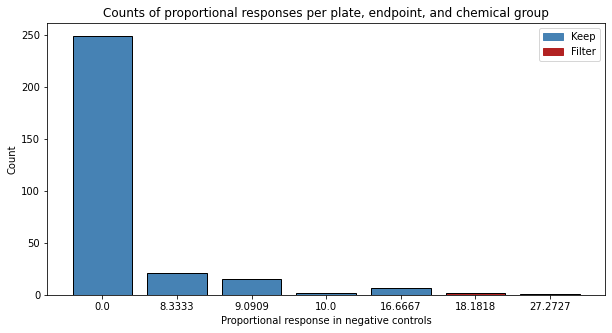

In [16]:
Long.filter_negative_control(percentage = 18, apply = False, diagnostic_plot = True)

In [17]:
Long.filter_negative_control_df

,Response,Count,Filter
0,0.000000,249,Keep
1,8.333333,21,Keep
2,9.090909,15,Keep
3,10.000000,2,Keep
4,16.666667,7,Keep
5,18.181818,2,Filter
6,27.272727,1,Filter


In [18]:
# Apply the negative control filter
Long.filter_negative_control(percentage = 18, apply = True)
Long.plate_groups

,chemical.id,conc,plate.id,endpoint,bmdrc.num.tot,bmdrc.num.nonna,bmdrc.num.affected,bmdrc.Plate.ID,bmdrc.Endpoint.ID,bmdrc.filter,bmdrc.filter.reason
0,3757,0.0,19877,ALL_BUT_MORT,12,12,0.0,3757 19877 ALL_BUT_MORT,3757 ALL_BUT_MORT,Keep,
1,3757,0.0,19877,ANY120,12,12,0.0,3757 19877 ANY120,3757 ANY120,Keep,
2,3757,0.0,19877,ANY24,12,12,0.0,3757 19877 ANY24,3757 ANY24,Keep,
3,3757,0.0,19877,AXIS,12,12,0.0,3757 19877 AXIS,3757 AXIS,Keep,
4,3757,0.0,19877,BRAI,12,12,0.0,3757 19877 BRAI,3757 BRAI,Keep,
...,...,...,...,...,...,...,...,...,...,...,...
2371,3863,10.0,20637,TCHR,12,8,0.0,3863 20637 TCHR,3863 TCHR,Keep,
2372,3863,10.0,20637,TOT_MORT,12,8,2.0,3863 20637 TOT_MORT,3863 TOT_MORT,Filter,negative_control_filter
2373,3863,10.0,20637,TRUN,12,6,0.0,3863 20637 TRUN,3863 TRUN,Keep,
2374,3863,10.0,20637,TR__,12,6,0.0,3863 20637 TR__,3863 TR__,Keep,


#### Minimum Concentration Filter

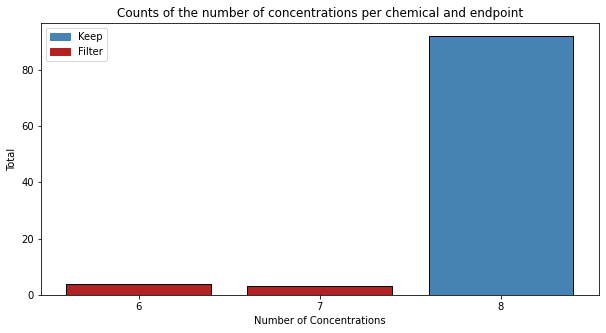

In [19]:
Long.filter_min_concentration(count = 8, apply = False, diagnostic_plot = True)

In [20]:
Long.filter_min_concentration_df

,NumConc,Count,Filter
1,6,4,Filter
2,7,3,Filter
0,8,92,Keep


In [21]:
# Apply the minimum concentration filter
Long.filter_min_concentration(count = 8, apply = True)
Long.plate_groups[Long.plate_groups["bmdrc.Endpoint.ID"] == "3863 ANY24"]

,chemical.id,conc,plate.id,endpoint,bmdrc.num.tot,bmdrc.num.nonna,bmdrc.num.affected,bmdrc.Plate.ID,bmdrc.Endpoint.ID,bmdrc.filter,bmdrc.filter.reason
1586,3863,0.000,20312,ANY24,12,12,1.0,3863 20312 ANY24,3863 ANY24,Remove,min_concentration_filter
1619,3863,0.000,20627,ANY24,12,11,1.0,3863 20627 ANY24,3863 ANY24,Remove,min_concentration_filter
1652,3863,0.000,20637,ANY24,12,12,1.0,3863 20637 ANY24,3863 ANY24,Remove,min_concentration_filter
1685,3863,0.100,20312,ANY24,12,12,3.0,3863 20312 ANY24,3863 ANY24,Remove,negative_control_filter min_concentration_filter
1718,3863,0.100,20627,ANY24,12,9,1.0,3863 20627 ANY24,3863 ANY24,Remove,min_concentration_filter
1751,3863,0.100,20637,ANY24,12,11,3.0,3863 20637 ANY24,3863 ANY24,Remove,negative_control_filter min_concentration_filter
1784,3863,0.254,20312,ANY24,12,12,2.0,3863 20312 ANY24,3863 ANY24,Remove,min_concentration_filter
1817,3863,0.254,20627,ANY24,12,11,3.0,3863 20627 ANY24,3863 ANY24,Remove,negative_control_filter min_concentration_filter
1850,3863,0.254,20637,ANY24,12,12,2.0,3863 20637 ANY24,3863 ANY24,Remove,min_concentration_filter
1883,3863,0.645,20312,ANY24,12,12,0.0,3863 20312 ANY24,3863 ANY24,Remove,min_concentration_filter


#### Correlation Score Filter

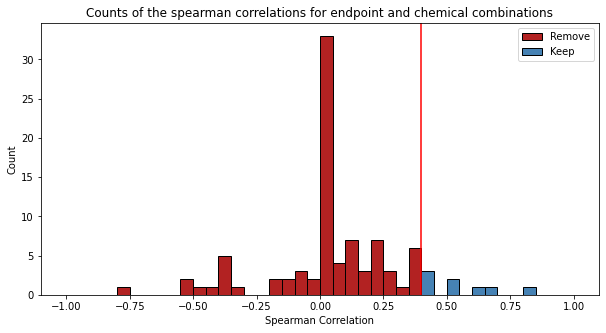

In [22]:
Long.filter_correlation_score(score = 0.4, diagnostic_plot = True)

In [23]:
Long.filter_correlation_score_df

,bmdrc.Endpoint.ID,Spearman,Filter
0,3757 ALL_BUT_MORT,-0.180736,Remove
1,3757 ANY120,0.323359,Remove
2,3757 ANY24,0.610789,Keep
3,3757 AXIS,0.247436,Remove
4,3757 BRAI,-0.082479,Remove
...,...,...,...
87,3863 SWIM,0.000000,Remove
88,3863 TCHR,0.082479,Remove
89,3863 TRUN,-0.155870,Remove
90,3863 TR__,0.082479,Remove


In [24]:
Long.filter_correlation_score(score = 0.2, apply = True)

mytestdf = Long.plate_groups
mytestdf

,chemical.id,conc,plate.id,endpoint,bmdrc.num.tot,bmdrc.num.nonna,bmdrc.num.affected,bmdrc.Plate.ID,bmdrc.Endpoint.ID,bmdrc.filter,bmdrc.filter.reason
0,3757,0.0,19877,ALL_BUT_MORT,12,12,0.0,3757 19877 ALL_BUT_MORT,3757 ALL_BUT_MORT,Remove,correlation_score_filter
1,3757,0.0,19877,ANY120,12,12,0.0,3757 19877 ANY120,3757 ANY120,Keep,
2,3757,0.0,19877,ANY24,12,12,0.0,3757 19877 ANY24,3757 ANY24,Keep,
3,3757,0.0,19877,AXIS,12,12,0.0,3757 19877 AXIS,3757 AXIS,Keep,
4,3757,0.0,19877,BRAI,12,12,0.0,3757 19877 BRAI,3757 BRAI,Remove,correlation_score_filter
...,...,...,...,...,...,...,...,...,...,...,...
2371,3863,10.0,20637,TCHR,12,8,0.0,3863 20637 TCHR,3863 TCHR,Remove,correlation_score_filter
2372,3863,10.0,20637,TOT_MORT,12,8,2.0,3863 20637 TOT_MORT,3863 TOT_MORT,Remove,negative_control_filter min_concentration_filter
2373,3863,10.0,20637,TRUN,12,6,0.0,3863 20637 TRUN,3863 TRUN,Remove,correlation_score_filter
2374,3863,10.0,20637,TR__,12,6,0.0,3863 20637 TR__,3863 TR__,Remove,correlation_score_filter


Filter suggestions: 
- Add a filter to remove a concentration if it doesn't have enough non-NA values 

## Module 4: Fit Models

In [25]:
Long.fit_models()

In [26]:
# Summary Statistics for filtered values 
Long.bmds_filtered

,bmdrc.Endpoint.ID,Model,BMD10,BMDL,BMD50,AUC,Min_Dose,Max_Dose,AUC_Norm
0,3757 ALL_BUT_MORT,NaN,NaN,NaN,NaN,1.595543,0.0,30.0,0.053185
1,3757 BRAI,NaN,NaN,NaN,NaN,0.983144,0.0,30.0,0.032771
2,3757 CFIN,NaN,NaN,NaN,NaN,0.000000,0.0,30.0,0.000000
3,3757 CIRC,NaN,NaN,NaN,NaN,0.000000,0.0,30.0,0.000000
4,3757 CRAN,NaN,NaN,NaN,NaN,0.983144,0.0,30.0,0.032771
...,...,...,...,...,...,...,...,...,...
69,3863 TCHR,NaN,NaN,NaN,NaN,0.041458,0.0,10.0,0.004146
70,3863 TOT_MORT,NaN,NaN,NaN,NaN,2.008254,0.0,10.0,0.200825
71,3863 TRUN,NaN,NaN,NaN,NaN,0.064777,0.0,10.0,0.006478
72,3863 TR__,NaN,NaN,NaN,NaN,0.045227,0.0,10.0,0.004523


In [27]:
Long.model_fits

{'3757 ANY120': [{'Logistic': 0.146597351656366,
   'Gamma': 0.18200762755099897,
   'Weibull': 0.18567084630663966,
   'Log Logistic': 0.0,
   'Probit': nan,
   'Log Probit': 0.1857511920592101,
   'Multistage2': 0.570665991298583,
   'Quantal Linear': 0.14606031018244292,
   'bmdrc.Endpoint.ID': '3757 ANY120'},
   array([-2.87644037,  0.01578402]),
   1      0.053331
   34     0.053331
   100    0.055482
   133    0.055482
   166    0.055482
   199    0.058086
   232    0.058086
   265    0.058086
   298    0.060077
   364    0.060077
   397    0.061885
   430    0.061885
   463    0.061885
   496    0.064026
   595    0.073729
   661    0.073729
   760    0.082950
   Name: conc, dtype: float64,
   0.146597351656366,
   86.63813743468398],
  'Logistic',
  {'Logistic': 86.63813743468398,
   'Gamma': 88.47293240063672,
   'Weibull': 88.8050046923672,
   'Log Logistic': nan,
   'Probit': nan,
   'Log Probit': 88.80544813966142,
   'Multistage2': 97.01364781250768,
   'Quantal Linear': 8

## Module 5: Output Modules

#### Benchmark Dose

In [28]:
Long.output_benchmark_dose()
response = Long.output_res_benchmark_dose
response

,Chemical_ID,End_Point,Model,BMD10,BMDL,BMD50,AUC,Min_Dose,Max_Dose,AUC_Norm,DataQC_Flag,BMD_Analysis_Flag,BMD10_Flag,BMD50_Flag,bmdrc.Endpoint.ID
14,3861,MORT,Quantal Linear,55.745082,NaN,366.736494,NaN,0.0,100.0,NaN,1,1,1,0,3861 MORT
17,3861,TRUN,Logistic,79.635415,NaN,109.676972,NaN,0.0,100.0,NaN,1,1,1,0,3861 TRUN
4,3757,MO24,Logistic,29.803695,NaN,63.939148,2.082500,0.0,30.0,0.069417,1,1,1,0,3757 MO24
1,3757,ANY24,Quantal Linear,22.947647,NaN,150.968288,3.148952,0.0,30.0,0.104965,1,1,1,0,3757 ANY24
12,3861,JAW_,Quantal Linear,53.979623,NaN,355.121868,NaN,0.0,100.0,NaN,1,1,1,0,3861 JAW_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,3757,LTRK,NaN,NaN,NaN,NaN,0.872727,0.0,30.0,0.029091,0,0,0,0,3757 LTRK
8,3757,JAW_,NaN,NaN,NaN,NaN,0.983144,0.0,30.0,0.032771,0,0,0,0,3757 JAW_
7,3757,EYE_,NaN,NaN,NaN,NaN,0.983144,0.0,30.0,0.032771,0,0,0,0,3757 EYE_
6,3757,EDEM,NaN,NaN,NaN,NaN,1.303977,0.0,30.0,0.043466,0,0,0,0,3757 EDEM


#### Model Fits

In [29]:
Long.p_value_df

,Logistic,Gamma,Weibull,Log Logistic,Probit,Log Probit,Multistage2,Quantal Linear,bmdrc.Endpoint.ID
0,1.465974e-01,0.182008,0.185671,0.0,NaN,0.185751,0.570666,0.146060,3757 ANY120
1,1.585826e-01,0.092596,0.092209,0.0,NaN,1.000000,0.285999,0.132046,3757 ANY24
2,7.884213e-01,0.874967,0.568812,0.0,NaN,1.000000,0.327662,0.532701,3757 AXIS
3,4.386008e-01,0.394137,0.317671,0.0,NaN,1.000000,0.266147,0.435133,3757 BRN_
4,8.095800e-01,0.803091,0.815325,0.0,NaN,1.000000,0.519515,0.799101,3757 MO24
5,6.004337e-01,0.677033,0.396299,0.0,NaN,1.000000,0.477175,0.432291,3757 MUSC
6,7.918557e-01,0.866695,0.582222,0.0,NaN,1.000000,0.243296,0.559481,3757 NC__
7,2.645069e-01,0.309531,0.128625,0.0,NaN,1.000000,0.177856,0.261819,3757 TOT_MORT
8,6.906835e-01,0.747675,0.357185,0.0,NaN,NaN,0.999234,0.680722,3861 ALL_BUT_MORT
9,6.906835e-01,0.747675,0.357185,0.0,NaN,NaN,0.999234,0.680722,3861 BRN_


In [30]:
Long.aic_df

,Logistic,Gamma,Weibull,Log Logistic,Probit,Log Probit,Multistage2,Quantal Linear,bmdrc.Endpoint.ID,Min_AIC,Min_Model
0,86.638137,88.472932,88.805005,NaN,NaN,88.805448,97.013648,86.657349,3757 ANY120,86.638137,Logistic
1,69.408601,69.815751,69.810865,NaN,NaN,inf,81.185018,68.236637,3757 ANY24,68.236637,Quantal Linear
2,16.550478,18.660599,18.069009,NaN,NaN,inf,40.293368,16.116423,3757 AXIS,16.116423,Quantal Linear
3,44.333682,46.433468,45.376356,NaN,NaN,inf,61.892001,44.322095,3757 BRN_,44.322095,Quantal Linear
4,92.288764,93.877172,96.935612,NaN,NaN,inf,102.066775,92.830286,3757 MO24,92.288764,Logistic
5,27.061557,29.116482,28.273402,NaN,NaN,inf,55.128764,26.572568,3757 MUSC,26.572568,Quantal Linear
6,16.816201,18.897779,18.387216,NaN,NaN,inf,42.928197,16.443194,3757 NC__,16.443194,Quantal Linear
7,64.343814,66.306683,67.164706,NaN,NaN,inf,74.852062,64.613628,3757 TOT_MORT,64.343814,Logistic
8,75.107103,77.135512,73.419277,NaN,NaN,NaN,128.174309,75.041024,3861 ALL_BUT_MORT,73.419277,Weibull
9,75.107103,77.135512,73.419277,NaN,NaN,NaN,128.174309,75.041024,3861 BRN_,73.419277,Weibull


## Benchmark Dose Curves

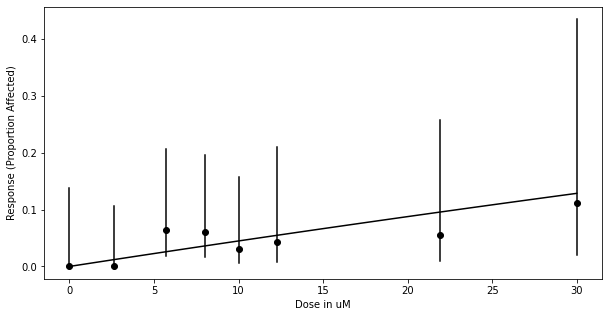

In [37]:
Long.response_curve(chemical_name = 3757, endpoint_name = "ANY24")

In [ ]:
Long.bmds

,bmdrc.Endpoint.ID,Model,BMD10,BMDL,BMD50,AUC,Min_Dose,Max_Dose,AUC_Norm,DataQC_Flag
0,3757 ANY24,Quantal Linear,22.947647,NaN,150.968288,3.148952,0.0,30.0,0.104965,1
1,3757 AXIS,Quantal Linear,204.082142,NaN,1342.618344,0.872727,0.0,30.0,0.029091,1
2,3757 MO24,Logistic,29.803695,NaN,63.939148,2.082500,0.0,30.0,0.069417,1
3,3757 NC__,Quantal Linear,240.376653,65.829224,1581.393166,0.000000,0.0,30.0,0.000000,1
4,3861 JAW_,Quantal Linear,53.979623,NaN,355.121868,NaN,0.0,100.0,NaN,1
5,3861 MORT,Quantal Linear,55.745082,NaN,366.736494,NaN,0.0,100.0,NaN,1
6,3861 PE__,Quantal Linear,51.688195,NaN,340.046995,NaN,0.0,100.0,NaN,1
7,3861 TRUN,Logistic,79.635415,NaN,109.676972,NaN,0.0,100.0,NaN,1
8,3861 TR__,Logistic,80.803755,60.712057,110.831769,NaN,0.0,100.0,NaN,1
9,3863 OTIC,Quantal Linear,63.938638,17.511905,420.640375,0.180909,0.0,10.0,0.018091,1
